In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
propiedades = pd.read_csv('properati.csv')

In [4]:
#Elimino columnas innecesarias
propiedades.drop(['id', 'geonames_id', 'lat-lon', 'properati_url', 'description', 'title', 'image_thumbnail'], axis = 1, inplace = True)
propiedades.head(2)


,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
0,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,NaN,120000.0,USD,2117340.0,120000.0,333.0,93.0,360.36036,1290.322581,NaN,NaN,NaN
1,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,NaN,220000.0,USD,3881790.0,220000.0,220.0,220.0,1000.00000,1000.000000,NaN,NaN,NaN


In [5]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187482 entries, 0 to 187481
Data columns (total 20 columns):
created_on                    187482 non-null object
operation                     187482 non-null object
property_type                 187482 non-null object
place_name                    187447 non-null object
place_with_parent_names       187482 non-null object
country_name                  187482 non-null object
state_name                    187482 non-null object
lat                           118761 non-null float64
lon                           118761 non-null float64
price                         154443 non-null float64
currency                      154441 non-null object
price_aprox_local_currency    154443 non-null float64
price_aprox_usd               154443 non-null float64
surface_total_in_m2           125027 non-null float64
surface_covered_in_m2         152420 non-null float64
price_usd_per_m2              105024 non-null float64
price_per_m2                  131

In [8]:
#Elimino los registros que no sean de Capital Federal o Gran Buenos Aires
capital = propiedades ['state_name'] == 'Capital Federal'
gba = propiedades ['state_name'].str.contains('Bs.As. G.B.A.')
propiedades = propiedades [capital | gba].reset_index()
propiedades.drop("index", axis = 1, inplace = True)
propiedades.info()

# podemos reemplazar es por la siguiente linea creo 
#( no lo hice porque en el repo no esta el csv y no se cual tenias)
# propiedades = propiedades.loc[propiedades.state_name.str.contains('Bs.As. G.B.A.|Capital Federal'),:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124746 entries, 0 to 124745
Data columns (total 20 columns):
created_on                    124746 non-null object
operation                     124746 non-null object
property_type                 124746 non-null object
place_name                    124711 non-null object
place_with_parent_names       124746 non-null object
country_name                  124746 non-null object
state_name                    124746 non-null object
lat                           75504 non-null float64
lon                           75504 non-null float64
price                         110203 non-null float64
currency                      110202 non-null object
price_aprox_local_currency    110203 non-null float64
price_aprox_usd               110203 non-null float64
surface_total_in_m2           89385 non-null float64
surface_covered_in_m2         109180 non-null float64
price_usd_per_m2              79108 non-null float64
price_per_m2                  98873 n

In [9]:
#Compruebo que solo haya capital y gba
propiedades.groupby('state_name').agg(np.size)['operation']

state_name
Bs.As. G.B.A. Zona Norte    39888
Bs.As. G.B.A. Zona Oeste    22571
Bs.As. G.B.A. Zona Sur      18135
Capital Federal             44152
Name: operation, dtype: int64

In [10]:
def calcularPrecioM2(fila):
    """Recibe una lista con precio total, superficie total, superficie cubierta y precio por metro cuadrado,
    y calcula este ultimo a partir de los anteriores, cuando es posible"""
    precio_total,superficie_total,superficie_cubierta,precio_m2 = fila
    if (np.isnan(precio_m2)):
        if (superficie_total and not np.isnan(superficie_total)):
            return precio_total/superficie_total
        if(superficie_cubierta and not np.isnan(superficie_cubierta)):
            return precio_total/superficie_cubierta
    return precio_m2

In [11]:
#Calculo el precio por metro cuadrado a partir del precio total y la superficie
propiedades.loc[:,'price_usd_per_m2'] = propiedades.loc[:,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2']].apply(calcularPrecioM2,axis = 1)
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124746 entries, 0 to 124745
Data columns (total 20 columns):
created_on                    124746 non-null object
operation                     124746 non-null object
property_type                 124746 non-null object
place_name                    124711 non-null object
place_with_parent_names       124746 non-null object
country_name                  124746 non-null object
state_name                    124746 non-null object
lat                           75504 non-null float64
lon                           75504 non-null float64
price                         110203 non-null float64
currency                      110202 non-null object
price_aprox_local_currency    110203 non-null float64
price_aprox_usd               110203 non-null float64
surface_total_in_m2           89385 non-null float64
surface_covered_in_m2         109180 non-null float64
price_usd_per_m2              103159 non-null float64
price_per_m2                  98873 

Como es el precio por metro cuadrado en cada zona? Cuales son los barrios con mayor promedio?

In [12]:
tiene_precio = propiedades['price_usd_per_m2'].notnull()
precio_por_zona = propiedades[tiene_precio].loc[:,['state_name','price_usd_per_m2']].groupby('state_name').agg([np.size,np.mean])
precio_por_zona

price_usd_per_m2             
                                     size         mean
state_name                                            
Bs.As. G.B.A. Zona Norte          36018.0  2300.580157
Bs.As. G.B.A. Zona Oeste          15868.0  2183.777937
Bs.As. G.B.A. Zona Sur            12873.0  2827.342306
Capital Federal                   38400.0  3250.273159

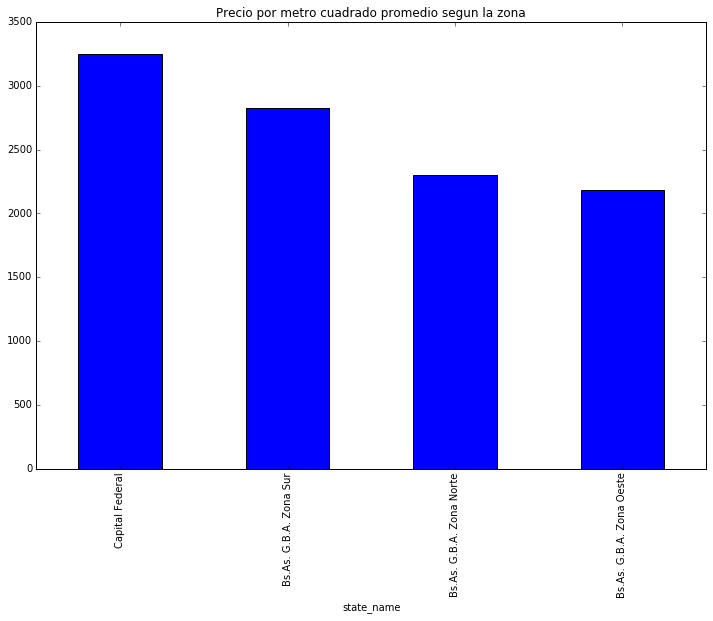

In [20]:
precio_por_zona[('price_usd_per_m2','mean')].sort_values(ascending = False).plot(kind='bar', title = "Precio por metro cuadrado promedio segun la zona", figsize=(12,8))

### Para capital federal

In [16]:
precios_capital = propiedades[tiene_precio].loc[propiedades.state_name == 'Capital Federal',['place_name','price_usd_per_m2']]
precios_capital = precios_capital.groupby('place_name').agg([np.size,np.mean])
precios_capital.describe()

price_usd_per_m2              
                  size          mean
count        62.000000     62.000000
mean        619.354839   3373.051670
std         734.647169   2851.645024
min           3.000000    874.195822
25%         115.500000   2171.653795
50%         340.500000   2546.540091
75%         736.500000   3287.791290
max        3233.000000  18946.638466

In [17]:
#Tomamos solo aquellos barrios que tengan mas de 300 publicaciones
precios_capital = precios_capital[precios_capital[('price_usd_per_m2','size')] > 300]

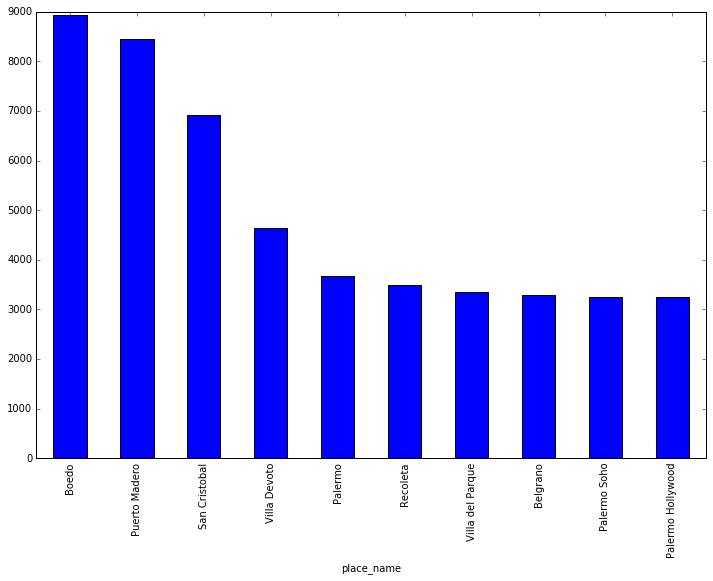

In [19]:
precios_capital[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8))

### Para gba zona norte

In [22]:
precios_zona_norte = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Norte'),['place_name','price_usd_per_m2']]
precios_zona_norte = precios_zona_norte.groupby('place_name').agg([np.size,np.mean])
precios_zona_norte.describe()

price_usd_per_m2              
                  size          mean
count       286.000000    286.000000
mean        125.818182   2131.849839
std         469.176107   3526.085809
min           1.000000     87.500000
25%           2.000000   1107.588963
50%           8.500000   1449.280354
75%          38.000000   2081.920967
max        4408.000000  38450.000000

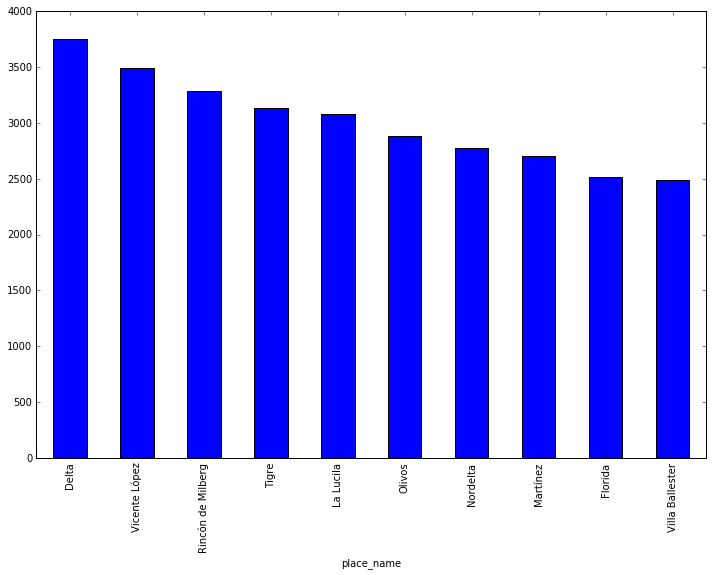

In [24]:
#Tomamos solo aquellos barrios que tengan mas de 100 publicaciones
precios_zona_norte = precios_zona_norte[precios_zona_norte[('price_usd_per_m2','size')] > 100]
precios_zona_norte[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8))

### Para gba zona oeste

In [25]:
precios_zona_oeste = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Oeste'),['place_name','price_usd_per_m2']]
precios_zona_oeste = precios_zona_oeste.groupby('place_name').agg([np.size,np.mean])
precios_zona_oeste.describe()

price_usd_per_m2              
                  size          mean
count        83.000000     83.000000
mean        191.180723   1818.240660
std         456.850809   2003.036948
min           1.000000     40.870430
25%           6.500000    828.085122
50%          28.000000   1323.137440
75%         142.500000   1813.189752
max        3261.000000  12795.186494

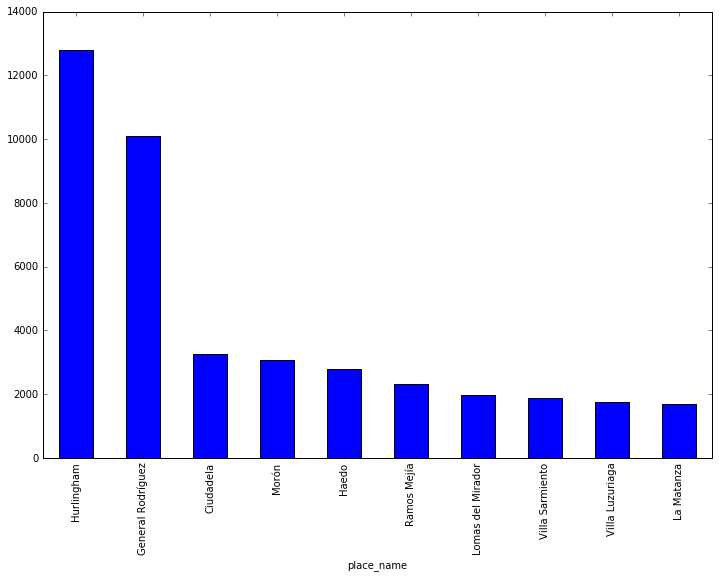

In [26]:
#Tomamos solo aquellos barrios que tengan mas de 100 publicaciones
precios_zona_oeste = precios_zona_oeste[precios_zona_oeste[('price_usd_per_m2','size')] > 100]
precios_zona_oeste[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8))

### Para gba zona sur

In [27]:
precios_zona_sur = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Sur'),['place_name','price_usd_per_m2']]
precios_zona_sur = precios_zona_sur.groupby('place_name').agg([np.size,np.mean])
precios_zona_sur.describe()

price_usd_per_m2              
                  size          mean
count       129.000000    129.000000
mean         99.790698   2013.715514
std         256.466454   3755.716109
min           1.000000     95.000000
25%           3.000000    748.209671
50%          11.000000   1255.645130
75%          48.000000   1765.393495
max        1786.000000  36569.965335

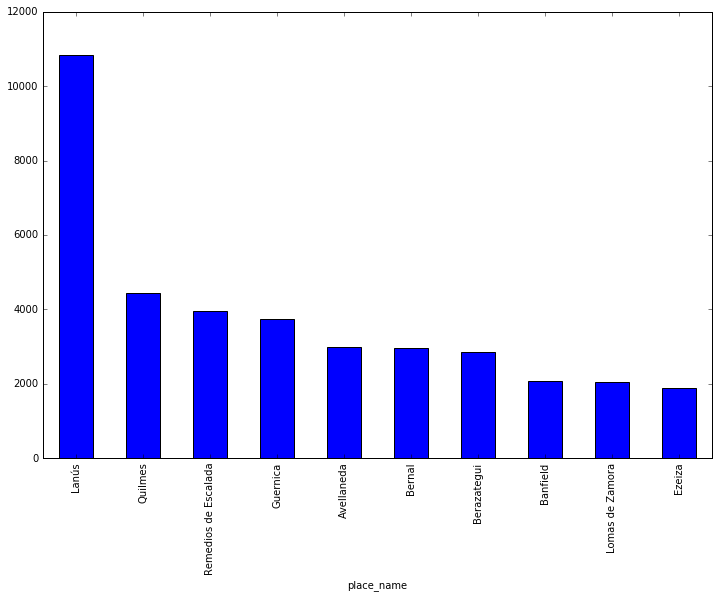

In [28]:
#Tomamos solo aquellos barrios que tengan mas de 100 publicaciones
precios_zona_sur = precios_zona_sur[precios_zona_sur[('price_usd_per_m2','size')] > 100]
precios_zona_sur[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8))

Como evoluciono el precio por metro cuadrado al pasar los anios?

In [29]:
def obtener_anio(fecha):
    return fecha.split('-')[0]


In [30]:
def obtener_mes(fecha):
    return fecha.split('-')[1]

In [31]:
propiedades.loc[:,'Year'] = propiedades.loc[:,'created_on'].apply(obtener_anio)
propiedades.loc[:,'Month'] = propiedades.loc[:,'created_on'].apply(obtener_mes)
propiedades.tail(3)

,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Year,Month
124743,2017-08-01,sell,house,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,-34.574470,-58.439483,108000.0,...,108000.0,40.0,40.0,2700.000000,2700.000000,NaN,NaN,1600.0,2017,08
124744,2017-08-01,sell,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,-34.496135,-58.500875,248000.0,...,248000.0,NaN,95.0,2610.526316,2610.526316,NaN,NaN,NaN,2017,08
124745,2017-08-01,sell,apartment,Villa Luro,|Argentina|Capital Federal|Villa Luro|,Argentina,Capital Federal,-34.641990,-58.495481,110000.0,...,110000.0,NaN,50.0,2200.000000,2200.000000,NaN,NaN,NaN,2017,08


In [32]:
precio_por_anio = propiedades[tiene_precio].loc[:,['Year','price_usd_per_m2']].groupby('Year').agg([np.size,np.mean])
precio_por_anio = precio_por_anio.loc[precio_por_anio[('price_usd_per_m2','size')] > 100,:]
precio_por_anio

price_usd_per_m2             
                 size         mean
Year                              
2013            323.0  1538.471831
2014           3006.0  1415.337828
2015           7609.0  1885.789439
2016          20278.0  2355.716581
2017          71940.0  2944.811643

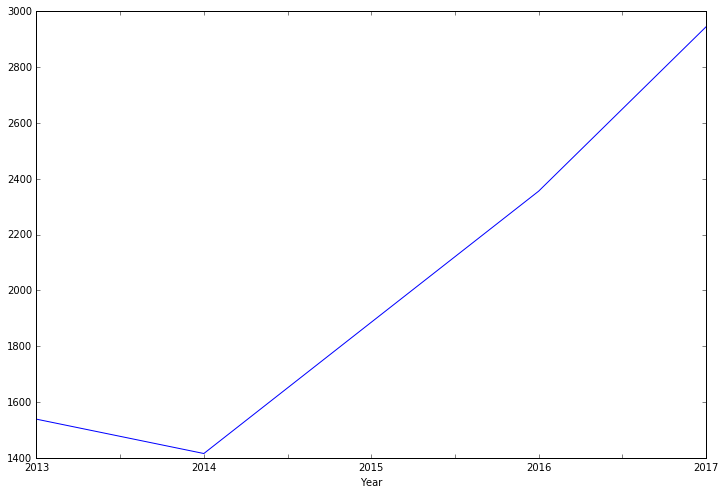

In [33]:
precio_por_anio[('price_usd_per_m2','mean')].plot(figsize=(12,8))

Como evoluciono el precio por metro cuadrado en 2016?

In [34]:
precios_2016 = propiedades[tiene_precio].loc[propiedades.Year == '2016',['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2016

,price_usd_per_m2
Month,
01,1992.618889
02,1619.149290
03,1829.413016
04,3194.014806
05,1742.296389
06,1968.151492
07,1938.372898
08,2658.260020
09,2390.018471


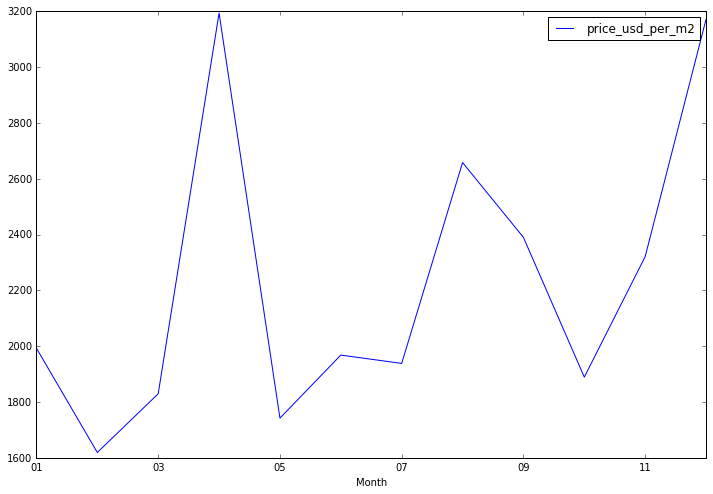

In [35]:
precios_2016.plot(figsize=(12,8))

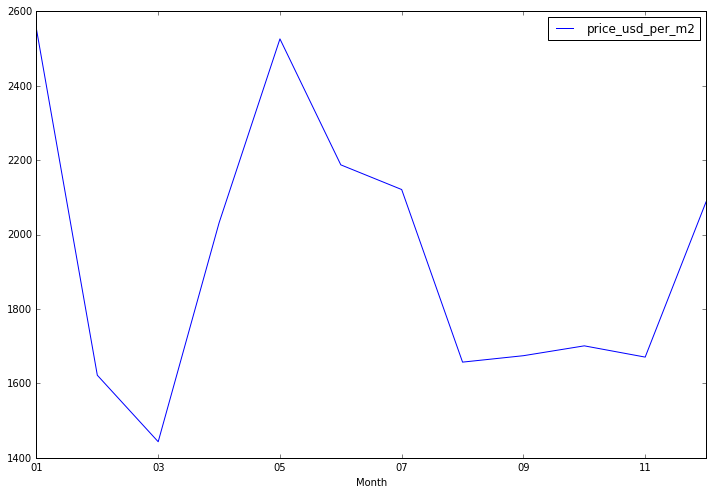

In [36]:
precios_2015 = propiedades[tiene_precio].loc[propiedades.Year == '2015',['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2015.plot(figsize=(12,8))

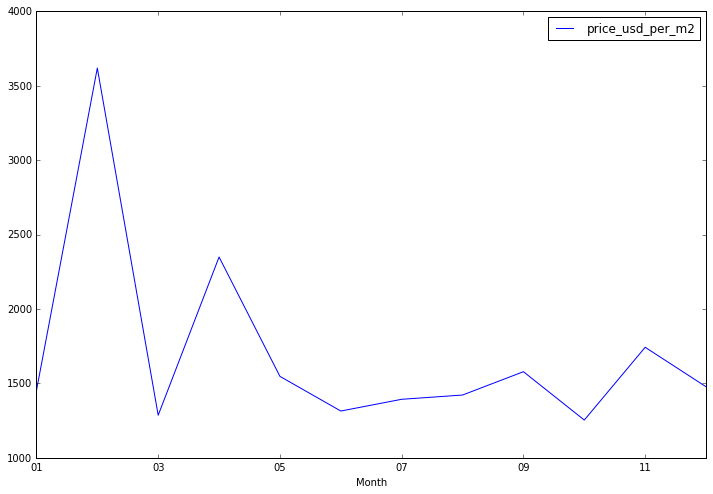

In [37]:
precios_2014 = propiedades[tiene_precio].loc[propiedades.Year == '2014',['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2014.plot(figsize=(12,8))

Que tipo de propiedad se vende mas?

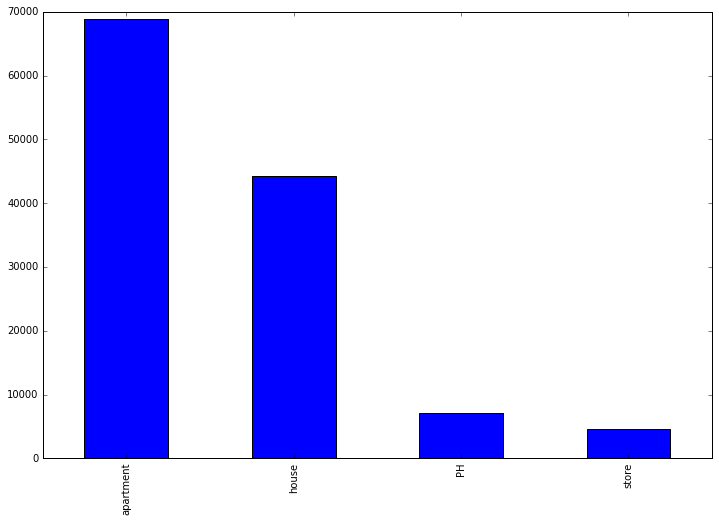

In [38]:
tipos_propiedades = propiedades.loc[:,'property_type'].value_counts()
tipos_propiedades.plot(kind='bar', figsize=(12,8))

Cual es la relacion entre la superficie cubierta y la cantidad de habitaciones?

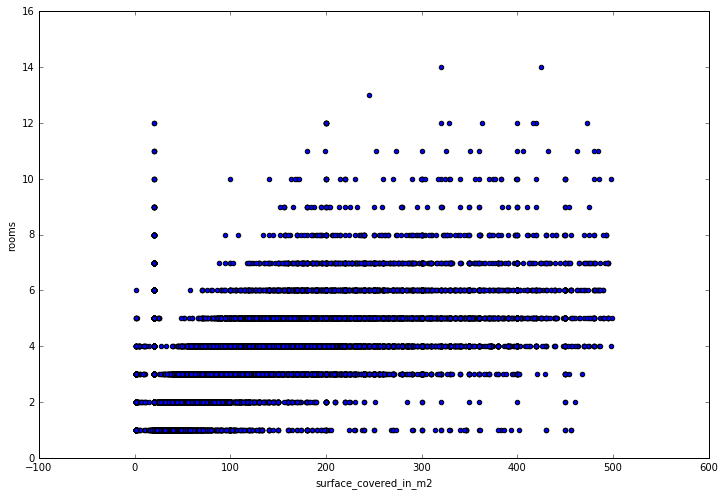

In [41]:
tiene_superficie = propiedades['surface_covered_in_m2'].notnull()
tiene_habitaciones = propiedades['rooms'].notnull()
habitaciones = propiedades.loc[tiene_superficie & tiene_habitaciones,:]
habitaciones = habitaciones.loc[(habitaciones['surface_covered_in_m2'] < 500) & (habitaciones['rooms'] < 15 ),:]
habitaciones.plot.scatter(x = 'surface_covered_in_m2', y = 'rooms', figsize=(12,8))

Relacion entre los distintos valores de dolar

In [44]:
valor_dolar = propiedades.loc[(propiedades['price_aprox_local_currency'].notnull()) & (propiedades['price_aprox_usd'].notnull()),['price_aprox_local_currency','price_aprox_usd','Year']]
valor_dolar ['dolar'] = valor_dolar['price_aprox_local_currency'] / valor_dolar['price_aprox_usd']
valor_dolar.describe()

,price_aprox_local_currency,price_aprox_usd,dolar
count,1.102030e+05,1.102030e+05,1.102020e+05
mean,4.709830e+06,2.669291e+05,1.764450e+01
std,6.777257e+06,3.841002e+05,3.227232e-08
min,0.000000e+00,0.000000e+00,1.764450e+01
25%,1.759157e+06,9.970000e+04,1.764450e+01
50%,2.823120e+06,1.600000e+05,1.764450e+01
75%,5.293350e+06,3.000000e+05,1.764450e+01
max,8.212711e+08,4.654544e+07,1.764450e+01


todos tienen el mismo valor del dolar????????????????????